In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = yf.download('DELTACORP.NS', start='2021-05-23', end='2023-05-23',interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-24,164.699997,176.800003,161.350006,175.350006,173.264389,12088385
2021-05-25,177.000000,178.899994,171.550003,175.000000,172.918549,6011684
2021-05-26,175.899994,182.000000,174.199997,176.050003,173.956070,5094891
2021-05-27,175.199997,176.300003,172.500000,173.850006,171.782227,2075651
2021-05-28,175.250000,176.000000,170.850006,171.699997,169.657776,1997272
...,...,...,...,...,...,...
2023-05-16,224.949997,230.449997,223.050003,227.000000,227.000000,3963511
2023-05-17,227.800003,229.750000,221.699997,226.199997,226.199997,2096869
2023-05-18,227.000000,227.500000,219.449997,222.050003,222.050003,1678665


In [3]:
def gain_loss(series):
    series=np.array(series)
    change_list=[]
    gains=[]
    losses=[]
    for i in range(len(series)-1):
        change_list.append(series[i+1]-series[i])
    for k in change_list:
        if k>0:
            gains.append(round(k,2))
        else:
            gains.append(0)
    for j in change_list:
        if j<0:
            losses.append(abs(round(j,2)))
        else:
            losses.append(0)
    return [gains,losses]

def avg_gain_loss(period,series):
    series = np.array(series)
    average_gains=[]
    avg = series[:period].mean()
    average_gains.append(round(avg,2))
    prev_avg_gain=avg
    for i in range(period,len(series)):
        avg_gain_val = ((prev_avg_gain*(period-1))+series[i])/period
        prev_avg_gain = avg_gain_val
        average_gains.append(round(avg_gain_val,2))
    return(average_gains)

Gain=gain_loss(data['Close'])[0]
Loss=gain_loss(data['Close'])[1]
Avg_Gains=avg_gain_loss(14,Gain)
Avg_Loss=avg_gain_loss(14,Loss)
RS = [round(x/y,2) for x,y in zip(Avg_Gains,Avg_Loss)]
RSI=[round((100-(100)/(1+rs)),2) for rs in RS]



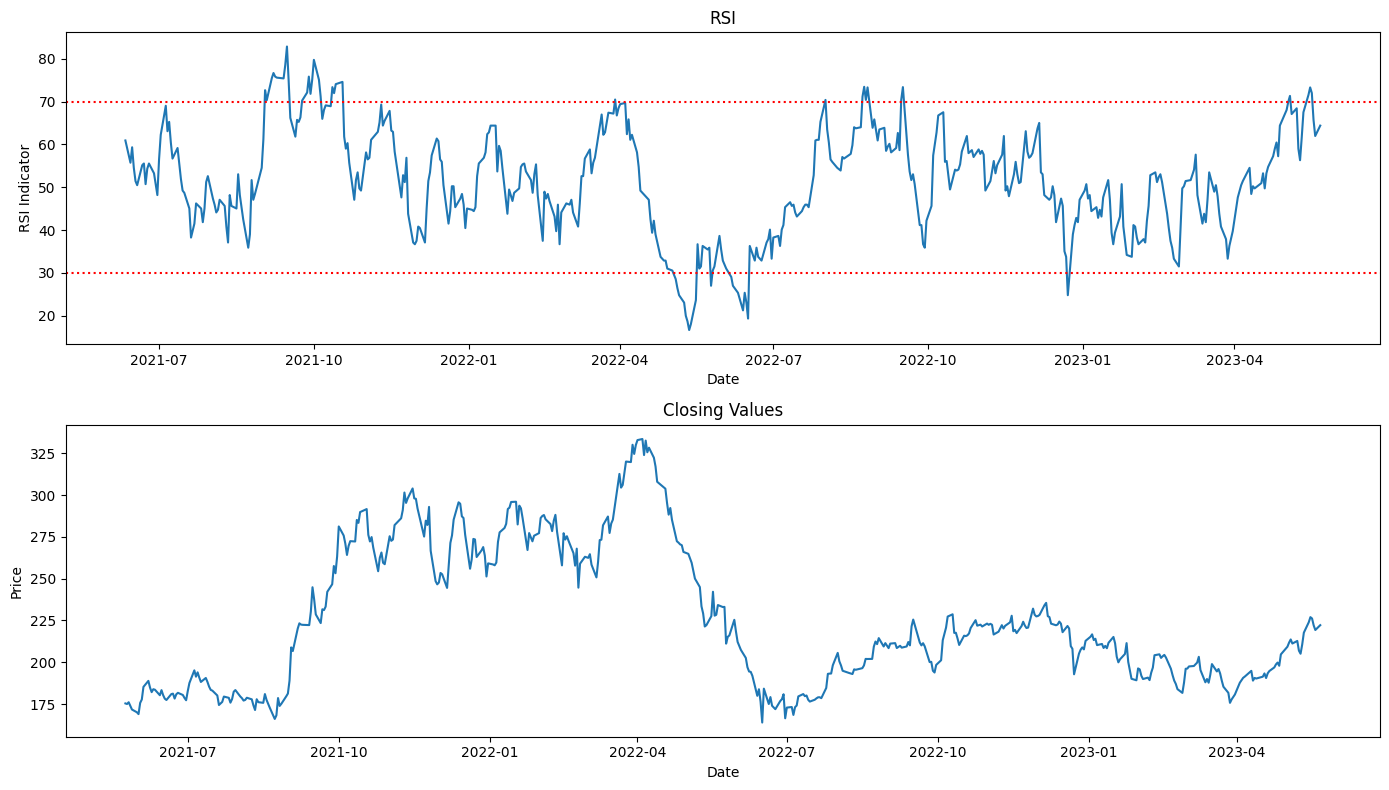

In [4]:
plt.figure(figsize=(14, 8))
plt.subplot(2,1,1)
plt.plot(data.index[14:],RSI)
plt.axhline(70,color='red',linestyle='dotted')
plt.axhline(30,color='red',linestyle='dotted')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('RSI Indicator')
plt.subplot(2,1,2)
plt.plot(data.index,data['Close'])
plt.title('Closing Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()


In [5]:
# FOR VOLUME
Vol_Up = gain_loss(data['Volume'])[0]
Vol_Down = gain_loss(data['Volume'])[1]
Avg_Vol_Up = avg_gain_loss(14,Vol_Up)
Avg_Vol_Down = avg_gain_loss(14,Vol_Down)
VRS = [round(x/y,2) for x,y in zip(Avg_Vol_Up,Avg_Vol_Down)]
VRSI=[round((100-(100)/(1+vrs)),2) for vrs in VRS]


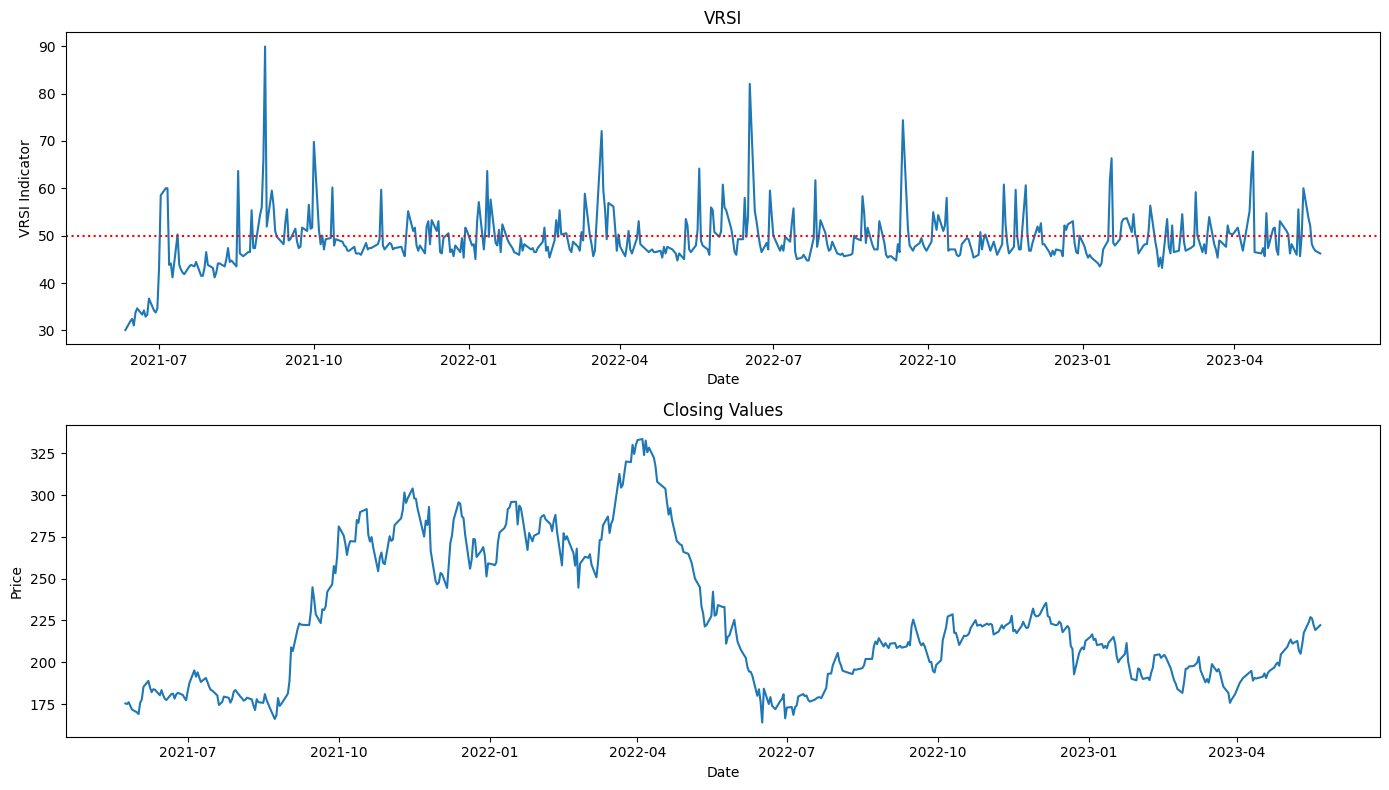

In [6]:
plt.figure(figsize=(14, 8))
plt.subplot(2,1,1)
plt.plot(data.index[14:],VRSI)
plt.axhline(50,color='red',linestyle='dotted')
plt.title('VRSI')
plt.xlabel('Date')
plt.ylabel('VRSI Indicator')
plt.subplot(2,1,2)
plt.plot(data.index,data['Close'])
plt.title('Closing Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
